# Adult Income Dataset
An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc

#Importing packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#read the dataset
df=pd.read_csv('/content/drive/MyDrive/project/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#checking missing value
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [ ]:
#droping the cloumns that have less impact to the target
df.drop(['fnlwgt','race'],axis=True,inplace=True)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


In [ ]:
df.shape

(48842, 13)

In [ ]:
#droping the duplicated datapoints
df=df.drop_duplicates()
df.shape

(41444, 13)

In [ ]:
df['workclass'].value_counts()

Private             27428
Self-emp-not-inc     3728
Local-gov            2969
?                    2354
State-gov            1912
Self-emp-inc         1642
Federal-gov          1380
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
df['occupation'].value_counts()

Prof-specialty       5606
Exec-managerial      5341
Sales                4661
Adm-clerical         4631
Craft-repair         4586
Other-service        4240
Machine-op-inspct    2382
?                    2364
Transport-moving     2015
Handlers-cleaners    1664
Farming-fishing      1427
Tech-support         1342
Protective-serv       930
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
df['native-country'].value_counts()

United-States                 36475
Mexico                          924
?                               849
Philippines                     293
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         105
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [ ]:
#Replacing ? with Nan
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)
df

,age,workclass,education,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,40,United-States,>50K
48836,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K


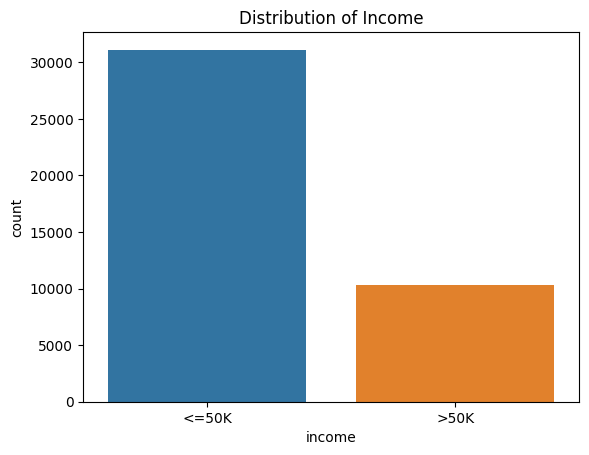

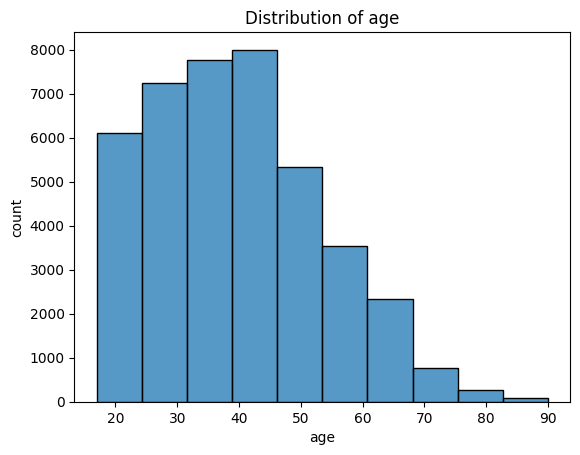

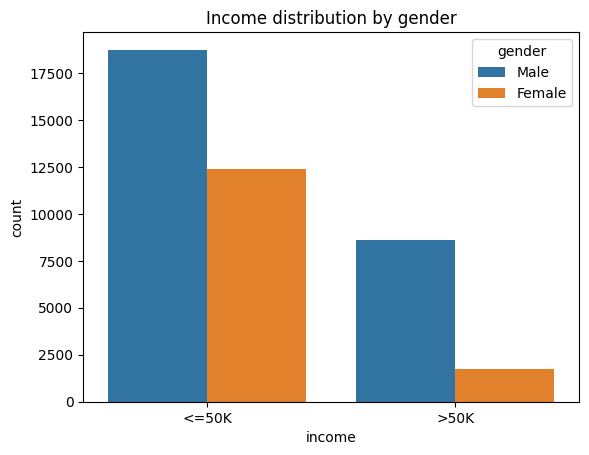

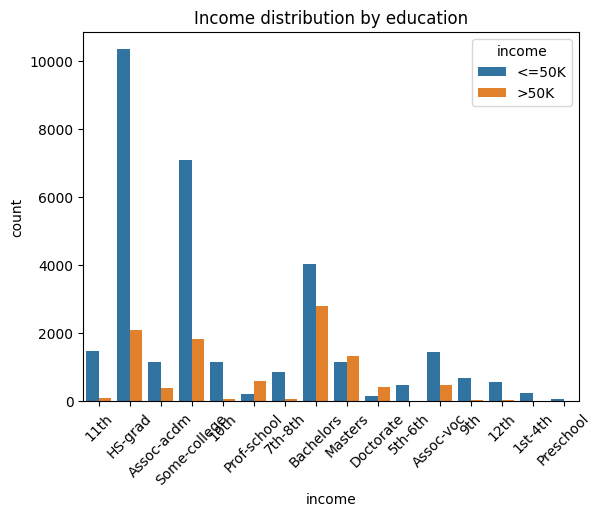

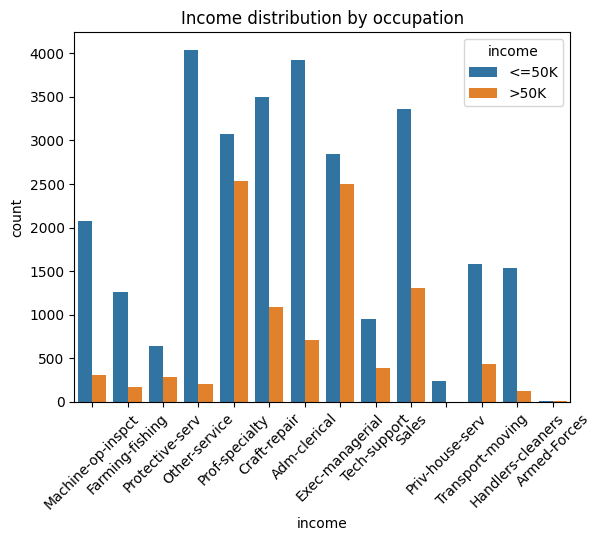

In [ ]:
#visualize the income distribution
sns.countplot(x='income',data=df)
plt.title('Distribution of Income')
plt.xlabel('income')
plt.ylabel('count')
plt.show()

#visualize distribution of age
sns.histplot(x='age',data=df,bins=10)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

#visualizing income distribution by gender
sns.countplot(x='income',hue='gender',data=df)
plt.title('Income distribution by gender')
plt.xlabel('income')
plt.ylabel('count')
plt.show()

#visualizing income distribution by education
sns.countplot(x='education',hue='income',data=df)
plt.title('Income distribution by education')
plt.xticks(rotation=45)
plt.xlabel('income')
plt.ylabel('count')
plt.show()

#visualizing income distribution by occupation
sns.countplot(x='occupation',hue='income',data=df)
plt.title('Income distribution by occupation')
plt.xticks(rotation=45)
plt.xlabel('income')
plt.ylabel('count')
plt.show()


In [ ]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
df['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1])

As we can see, 'education' & 'educational-num' both columns have similer values.\
'education' has string values.\
'educational-num' has numerical values.\
So, we can remove 'education' column

In [ ]:
df.drop(['education'],axis=1,inplace=True)
df

,age,workclass,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K
4,18,NaN,10,Never-married,NaN,Own-child,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,14,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,40,United-States,>50K
48836,22,Private,10,Never-married,Protective-serv,Not-in-family,Male,0,0,40,United-States,<=50K
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K


In [ ]:
#encoding
le=LabelEncoder()
lst=['workclass','marital-status','occupation','relationship','gender','native-country','income']
le=LabelEncoder()
for i in lst:
  df[i]=le.fit_transform(df[i])
df

,age,workclass,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,7,4,6,3,1,0,0,40,38,0
1,38,3,9,2,4,0,1,0,0,50,38,0
2,28,1,12,2,10,0,1,0,0,40,38,1
3,44,3,10,2,6,0,1,7688,0,40,38,1
4,18,8,10,4,14,3,0,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48835,53,3,14,2,3,0,1,0,0,40,38,1
48836,22,3,10,4,10,1,1,0,0,40,38,0
48837,27,3,12,2,12,5,0,0,0,38,38,0
48839,58,3,9,6,0,4,0,0,0,40,38,0


In [ ]:
X=df.iloc[:,:-1]
X

,age,workclass,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,7,4,6,3,1,0,0,40,38
1,38,3,9,2,4,0,1,0,0,50,38
2,28,1,12,2,10,0,1,0,0,40,38
3,44,3,10,2,6,0,1,7688,0,40,38
4,18,8,10,4,14,3,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...
48835,53,3,14,2,3,0,1,0,0,40,38
48836,22,3,10,4,10,1,1,0,0,40,38
48837,27,3,12,2,12,5,0,0,0,38,38
48839,58,3,9,6,0,4,0,0,0,40,38


In [ ]:
y=df.iloc[:,-1]
y

0        0
1        0
2        1
3        1
4        0
        ..
48835    1
48836    0
48837    0
48839    0
48841    1
Name: income, Length: 41444, dtype: int64

In [ ]:
y.value_counts()

0    31118
1    10326
Name: income, dtype: int64

This dataset is an imbalanced dataset

In [ ]:
scaler=RobustScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.65      ,  0.        , -0.75      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.25      , ...,  0.        ,
         1.42857143,  0.        ],
       [-0.5       , -2.        ,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.55      ,  0.        ,  0.5       , ...,  0.        ,
        -0.28571429,  0.        ],
       [ 1.        ,  0.        , -0.25      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.7       ,  1.        , -0.25      , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=15)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
ab = AdaBoostClassifier(random_state=1)
rf = RandomForestClassifier(random_state=4)
Gnb = GaussianNB()
svc = SVC()
tree = DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
lst=[knn,ab,rf,Gnb,svc,tree]
for model in lst:
  print('*******************',model,'*************')
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))
  print(accuracy_score(y_pred,y_test))

******************* KNeighborsClassifier(n_neighbors=3) *************
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      9329
           1       0.68      0.62      0.65      3105

    accuracy                           0.83     12434
   macro avg       0.78      0.76      0.77     12434
weighted avg       0.83      0.83      0.83     12434

0.8316712240630529
******************* AdaBoostClassifier(random_state=1) *************
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9329
           1       0.76      0.60      0.67      3105

    accuracy                           0.85     12434
   macro avg       0.82      0.77      0.79     12434
weighted avg       0.85      0.85      0.85     12434

0.8545922470645005
******************* RandomForestClassifier(random_state=4) *************
              precision    recall  f1-score   support

           0       0.87      0.91      0.

#Over sampling

In [ ]:
oversampling = SMOTE(random_state=479)
X_os,y_os = oversampling.fit_resample(X,y)

In [ ]:
scaler = RobustScaler()
X_scaled_os = scaler.fit_transform(X_os)

In [ ]:
#train_test_split
X_train_os,X_test_os,y_train_os,y_test_os = train_test_split(X_scaled_os,y_os,test_size=0.3,random_state=15785)

In [ ]:
knn_os = KNeighborsClassifier(n_neighbors=25)
ab_os = AdaBoostClassifier(random_state=68)
rf_os = RandomForestClassifier(random_state=4)
Gnb_os = GaussianNB()
svc_os = SVC()
tree_os = DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
lst = [knn_os,ab_os,rf_os,Gnb_os]
for model in lst:
  print('*******************',model,'*************')
  model.fit(X_train_os,y_train_os)
  y_pred_os=model.predict(X_test_os)
  print(classification_report(y_test_os,y_pred_os))
  print(accuracy_score(y_pred_os,y_test_os))

******************* KNeighborsClassifier(n_neighbors=25) *************
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      9291
           1       0.82      0.89      0.86      9380

    accuracy                           0.85     18671
   macro avg       0.85      0.85      0.85     18671
weighted avg       0.85      0.85      0.85     18671

0.8504632853087676
******************* AdaBoostClassifier(random_state=68) *************
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      9291
           1       0.83      0.85      0.84      9380

    accuracy                           0.84     18671
   macro avg       0.84      0.84      0.84     18671
weighted avg       0.84      0.84      0.84     18671

0.8383589523860533
******************* RandomForestClassifier(random_state=4) *************
              precision    recall  f1-score   support

           0       0.89      0.86      

#UnderSampling

In [ ]:
undersampling = RandomUnderSampler(random_state=479)
X_us,y_us = undersampling.fit_resample(X,y)

In [ ]:
scaler = RobustScaler()
X_scaled_us = scaler.fit_transform(X_us)

In [ ]:
X_train_us,X_test_us,y_train_us,y_test_us = train_test_split(X_scaled_us, y_us, test_size = 0.3, random_state = 1)

In [ ]:
knn_us = KNeighborsClassifier(n_neighbors=25)
ab_us = AdaBoostClassifier(random_state=1)
rf_us = RandomForestClassifier(random_state=4)
Gnb_us = GaussianNB()
svc_us = SVC()
tree_us = DecisionTreeClassifier()

In [ ]:
lst=[knn_us,ab_us,rf_us,Gnb_us]
for model in lst:
  print('*******************',model,'*************')
  model.fit(X_train_us,y_train_us)
  y_pred_us=model.predict(X_test_us)
  print(classification_report(y_test_us,y_pred_us))
  print(accuracy_score(y_pred_us,y_test_us))

******************* KNeighborsClassifier(n_neighbors=25) *************
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3139
           1       0.78      0.87      0.82      3057

    accuracy                           0.82      6196
   macro avg       0.82      0.82      0.82      6196
weighted avg       0.82      0.82      0.82      6196

0.816010329244674
******************* AdaBoostClassifier(random_state=1) *************
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      3139
           1       0.81      0.84      0.82      3057

    accuracy                           0.82      6196
   macro avg       0.82      0.82      0.82      6196
weighted avg       0.82      0.82      0.82      6196

0.8223047127178825
******************* RandomForestClassifier(random_state=4) *************
              precision    recall  f1-score   support

           0       0.82      0.80      0.

# Hyperparameter tuning

In [ ]:
# rf1=RandomForestClassifier()
# params= {'n_estimators':[50,100,200,300],
#         'criterion':['gini','entropy','log_loss'],
#          'max_features':['auto','sqrt','log2'],
#         'random_state':[1,3,5,7,9]}
# clf=RandomizedSearchCV(rf1,params,cv=10,scoring='accuracy',random_state=1)
# clf.fit(X_train_os,y_train_os)

In [ ]:
# print(clf.best_params_)

In [ ]:
# rf1_new=RandomForestClassifier(n_estimators=300,random_state=3,max_features='log2',criterion='entropy')
# rf1_new.fit(X_train_os,y_train_os)

In [ ]:
# y_pred_new=rf1_new.predict(X_test_os)
# y_pred_new

In [ ]:
# print(classification_report(y_pred_new,y_test_os))
# print(accuracy_score(y_pred_new,y_test_os))

#Best Perfoming Model

In [ ]:
rf_os = RandomForestClassifier(random_state=4)
rf_os.fit(X_train_os,y_train_os)
y_pred_os = rf_os.predict(X_test_os)
print(classification_report(y_pred_os,y_test_os))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      8941
           1       0.89      0.86      0.88      9730

    accuracy                           0.88     18671
   macro avg       0.88      0.88      0.88     18671
weighted avg       0.88      0.88      0.88     18671



In [ ]:
pred=rf_os.predict(scaler.transform([[25,3,7,4,6,3,1,0,0,40,38]]))
pred
if pred==0:
  print('salary is <=50K')
else:
  print('salary is >50k')

salary is <=50K


#Conclusion

From the above observation it is noted that randomforestclassifier with oversampling have maximum accuracy,precesionand recall.

**saving the trained model**

In [ ]:
filename='Income_model.sav'
pickle.dump(rf_os,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open('Income_model.sav','rb'))